In [14]:
import tweepy
import pandas as pd
from credentials import *
from IPython.display import display
import re
import nltk
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy
from textblob import TextBlob
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

import os, re, operator, warnings

In [15]:

CONSUMER_KEY    = "fbNBZZY1hpwtdEwwz7pQnHWo8"
CONSUMER_SECRET = "ntH67Zh2KgzZsWyslivT7u6bebL46AU00r5IBNBNSh8H76H2M9"

# Access:
ACCESS_TOKEN  = "767714641-lXCZF6l4OGKSq4sBVdih5jcDpMh5C9Q755YbNrTv"
ACCESS_SECRET = "uJS3aSeuIxop17PK7X724AG6M8UPEmHA0a0SLpyvrBYjI"
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [16]:
# We create an extractor object:
extractor = twitter_setup()
#tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200,tweet_mode="extended")
    
# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:2]:
    print(tweet.text)


Number of tweets extracted: 200.

5 recent tweets:

...Follow the money! The spy was there early in the campaign and yet never reported Collusion with Russia, because… https://t.co/gJGldziTWv
If the person placed very early into my campaign wasn’t a SPY put there by the previous Administration for politica… https://t.co/GNhqCqfGkm


In [17]:
'''
def processTweet2(tweet):
    # process the tweets

    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet    
for tweet in tweets:
    print(processTweet2(tweet))
'''

'\ndef processTweet2(tweet):\n    # process the tweets\n\n    #Convert www.* or https?://* to URL\n    tweet = re.sub(\'((www\\.[^\\s]+)|(https?://[^\\s]+))\',\'URL\',tweet)\n    #Convert @username to AT_USER\n    tweet = re.sub(\'@[^\\s]+\',\'AT_USER\',tweet)\n    #Remove additional white spaces\n    tweet = re.sub(\'[\\s]+\', \' \', tweet)\n    #Replace #word with word\n    tweet = re.sub(r\'#([^\\s]+)\', r\'\x01\', tweet)\n    #trim\n    tweet = tweet.strip(\'\'"\')\n    return tweet    \nfor tweet in tweets:\n    print(processTweet2(tweet))\n'

In [18]:
'''
# we add some words to the stop word list
texts, article = [], []
for w in tweets:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' :
        # we add the lematized version of the word
        article.append(w)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts.append(article)
        article = []
bigram = gensim.models.Phrases(texts)
texts = [bigram[line] for line in texts]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)
lsimodel.show_topics(num_topics=6)
'''

"\n# we add some words to the stop word list\ntexts, article = [], []\nfor w in tweets:\n    # if it's not a stop word or punctuation mark, add it to our article!\n    if w.text != '\n' :\n        # we add the lematized version of the word\n        article.append(w)\n    # if it's a new line, it means we're onto our next document\n    if w.text == '\n':\n        texts.append(article)\n        article = []\nbigram = gensim.models.Phrases(texts)\ntexts = [bigram[line] for line in texts]\ndictionary = Dictionary(texts)\ncorpus = [dictionary.doc2bow(text) for text in texts]\nlsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)\nlsimodel.show_topics(num_topics=6)\n"

In [19]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
print(data.head(10))

                                              Tweets  len                  ID  \
0  ...Follow the money! The spy was there early i...  139  999096013674680321   
1  If the person placed very early into my campai...  140  999096011174924289   
2  For the first time since Roe v. Wade, America ...  140  999087688983764992   
3  It was my honor to welcome @NASCAR Cup Series ...  137  999010902472122368   
4  Today, it was my great honor to welcome Presid...  134  998992271629570048   
5  .@AsaHutchinson, the great Governor of Arkansa...  140  998704493335334912   
6  Under our potential deal with China, they will...  135  998553122179084290   
7  The Wall Street Journal asks, “WHERE IN THE WO...   91  998546786628395009   
8  ...they then used to start an investigation ab...  140  998537117180588033   
9  ....top of the FBI. Brennan started this entir...  140  998534123399663616   

               Source   Likes    RTs  
0  Twitter for iPhone   26181   8410  
1  Twitter for iPhone   27072 

In [20]:
mx_like=np.max(data["Likes"])
print(mx_like)
indx=data[data["Likes"]==mx_like].index[0]
print("Maximum Liked Tweet: ",data["Tweets"][indx])

mx_rt=np.max(data["RTs"])
print(mx_rt)
idx=data[data["RTs"]==mx_rt].index[0]
print("Maximum  ",data["Tweets"][idx])

mx_len=np.max(data["len"])
print("Length Of Largest Tweet: ",mx_len)
print("Largest Tweet: ",data["Tweets"][mx_len])

361696
Maximum Liked Tweet:  Thank you Kanye, very cool! https://t.co/vRIC87M21X
108116
Maximum   Thank you Kanye, very cool! https://t.co/vRIC87M21X
Length Of Largest Tweet:  144
Largest Tweet:  A Rigged System - They don’t want to turn over Documents to Congress. What are they afraid of? Why so much redactin… https://t.co/Wm7yAaO4Bl


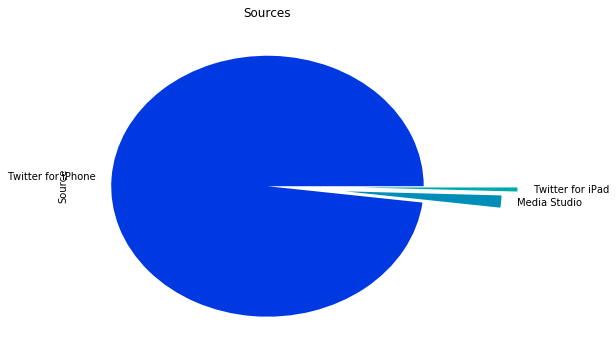

In [21]:
explode = (0,0.5,0.6)
colors=['#0038E2','#008DB8','#00AAAA']
data.Source.value_counts().plot(kind="pie",figsize=(7,6),explode=explode,colors = colors)
plt.title("Sources")
plt.show()

In [22]:
def clean_text(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_text(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Source,Likes,RTs,SA
0,...Follow the money! The spy was there early i...,139,999096013674680321,Twitter for iPhone,26181,8410,1
1,If the person placed very early into my campai...,140,999096011174924289,Twitter for iPhone,27072,8732,-1
2,"For the first time since Roe v. Wade, America ...",140,999087688983764992,Twitter for iPhone,32546,8658,1
3,It was my honor to welcome @NASCAR Cup Series ...,137,999010902472122368,Twitter for iPhone,38104,7676,1
4,"Today, it was my great honor to welcome Presid...",134,998992271629570048,Twitter for iPhone,48328,10270,1
5,".@AsaHutchinson, the great Governor of Arkansa...",140,998704493335334912,Twitter for iPhone,68347,17138,1
6,"Under our potential deal with China, they will...",135,998553122179084290,Twitter for iPhone,87330,19518,1
7,"The Wall Street Journal asks, “WHERE IN THE WO...",91,998546786628395009,Twitter for iPhone,106678,25671,1
8,...they then used to start an investigation ab...,140,998537117180588033,Twitter for iPhone,80049,21962,1
9,....top of the FBI. Brennan started this entir...,140,998534123399663616,Twitter for iPhone,69758,20123,1


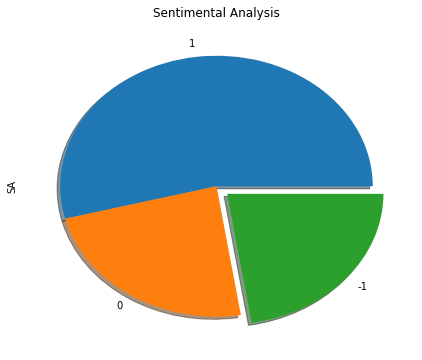

In [23]:
explode = (0,0.5,0.6)
colors=['#696969','#A9A9A9',"#D3D3D3"]
data.SA.value_counts().plot(kind="pie",figsize=(7,6),explode=(0,0,0.09),shadow=True)
plt.title("Sentimental Analysis")
plt.show()

In [24]:
'''
#Topic Modelling
# we add some words to the stop word list
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
Lm=WordNetLemmatizer()
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~//'''
'''
    t=[]
def clean(tweet):
    for w in data["Tweets"]:
        word=word_tokenize(w.lower())
        #p=[i for i in word if i not in stopwords]  
        #t=t.append(p)
        #t=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",t)
    return t
#print(data.head())
#data['Cleaned_Text']=([clean(tweet) for tweet in tweets])
 
data["Cleaned_Tweets"]=clean() 
data["Length_Of_Clean"]=len(data.iloc[-1])
print(data.head())
'''

SyntaxError: invalid syntax (<ipython-input-24-5d6639ae8d60>, line 8)

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
Lm=WordNetLemmatizer()
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~//'''
t1=[]

def clean(tweet):
    t=word_tokenize(tweet.lower())
    a=[i for i in t if i not in stopwords]
    a=" ".join(a)
    b=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", a).split())
    return b       
#clean(data["Tweets"])
data['Cleaned_Text']=[clean(tweet) for tweet in data["Tweets"]]
print(data.head())  
article=[i for i in data["Cleaned_Text"]]
doc_clean = [doc.split() for doc in article]
#print(doc_clean)
import gensim
from gensim import corpora
# Creating the term dictionary of our courpus, where every unique term is assigned an index.\
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Running and Trainign LDA model on the document term matrix.
ldamodel = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)
print("LDA Model")
print(ldamodel.print_topics(num_topics=3, num_words=10))
lsimodel = LsiModel(doc_term_matrix, num_topics=10, id2word=dictionary)
print("LSI Model")
print(lsimodel.show_topics(num_topics=5))
hdpmodel = HdpModel(doc_term_matrix, id2word=dictionary)
print("HDP Model")
print(hdpmodel.show_topics())

                                              Tweets  len                  ID  \
0  ...Follow the money! The spy was there early i...  139  999096013674680321   
1  If the person placed very early into my campai...  140  999096011174924289   
2  For the first time since Roe v. Wade, America ...  140  999087688983764992   
3  It was my honor to welcome @NASCAR Cup Series ...  137  999010902472122368   
4  Today, it was my great honor to welcome Presid...  134  998992271629570048   

               Source  Likes    RTs  SA  \
0  Twitter for iPhone  26181   8410   1   
1  Twitter for iPhone  27072   8732  -1   
2  Twitter for iPhone  32546   8658   1   
3  Twitter for iPhone  38104   7676   1   
4  Twitter for iPhone  48328  10270   1   

                                        Cleaned_Text  
0  follow money spy early campaign yet never repo...  
1  person placed early campaign spy put previous ...  
2  first time since roe v wade america pro life p...  
3  honor welcome nascar cup series

In [13]:
'''
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 
print(doc_clean)
'''

'\ndoc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."\ndoc2 = "My father spends a lot of time driving my sister around to dance practice."\ndoc3 = "Doctors suggest that driving may cause increased stress and blood pressure."\ndoc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."\ndoc5 = "Health experts say that Sugar is not good for your lifestyle."\n\n# compile documents\ndoc_complete = [doc1, doc2, doc3, doc4, doc5]\n\nfrom nltk.corpus import stopwords \nfrom nltk.stem.wordnet import WordNetLemmatizer\nimport string\nstop = set(stopwords.words(\'english\'))\nexclude = set(string.punctuation) \nlemma = WordNetLemmatizer()\ndef clean(doc):\n    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])\n    punc_free = \'\'.join(ch for ch in stop_free if ch not in exclude)\n    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())\n    return normalized\